In [407]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


In [408]:
df = pd.read_csv("Fish.csv")
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [409]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [410]:
df_copy = df.copy()

## Data Analysis

In [411]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [412]:
# Descriptive Statistics
print("Summary Statistics:")
print(df_copy.describe())

Summary Statistics:
            Weight     Length1     Length2     Length3      Height       Width
count   159.000000  159.000000  159.000000  159.000000  159.000000  159.000000
mean    398.326415   26.247170   28.415723   31.227044    8.970994    4.417486
std     357.978317    9.996441   10.716328   11.610246    4.286208    1.685804
min       0.000000    7.500000    8.400000    8.800000    1.728400    1.047600
25%     120.000000   19.050000   21.000000   23.150000    5.944800    3.385650
50%     273.000000   25.200000   27.300000   29.400000    7.786000    4.248500
75%     650.000000   32.700000   35.500000   39.650000   12.365900    5.584500
max    1650.000000   59.000000   63.400000   68.000000   18.957000    8.142000


In [413]:
# Calculate Z-score for each numeric column
z_scores = np.abs((df_copy[['Length1', 'Length2', 'Length3', 'Width', 'Height', 'Weight']] - df_copy[['Length1', 'Length2', 'Length3', 'Width', 'Height', 'Weight']].mean()) / df_copy[['Length1', 'Length2', 'Length3', 'Width', 'Height', 'Weight']].std())

# Define a threshold for outliers (e.g., Z-score > 3)
threshold = 3

# Find and print outliers
outliers = (z_scores > threshold).any(axis=1)
print("Outlier rows:")
print(df_copy[outliers])

Outlier rows:
    Species  Weight  Length1  Length2  Length3  Height  Width
142    Pike  1600.0     56.0     60.0     64.0   9.600  6.144
143    Pike  1550.0     56.0     60.0     64.0   9.600  6.144
144    Pike  1650.0     59.0     63.4     68.0  10.812  7.480


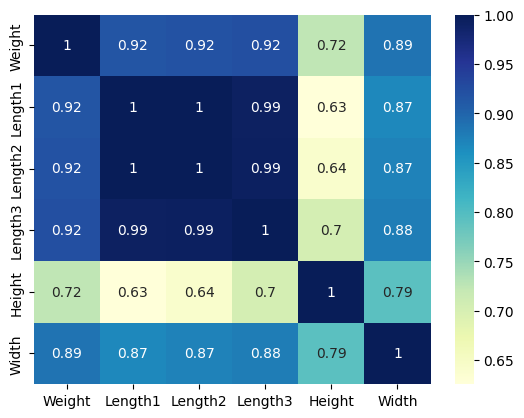

In [414]:
corr = df_copy.select_dtypes(include=np.number).corr()
dataplot = sb.heatmap(corr,  annot=True, cmap="YlGnBu") # cmap="YlGnBu",
plt.show()

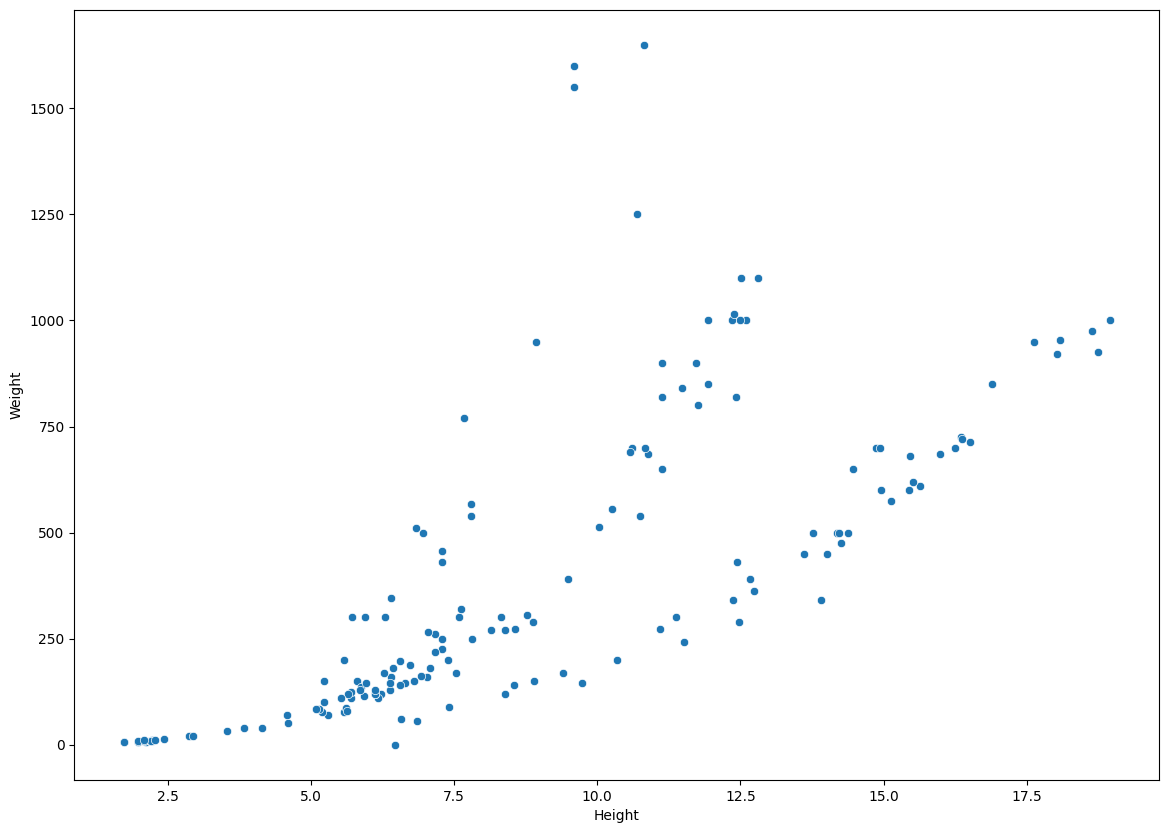

In [415]:
# Scatter Plots
plt.figure(figsize=(14, 10))
sb.scatterplot(x='Height', y='Weight', data=df_copy)
plt.show()

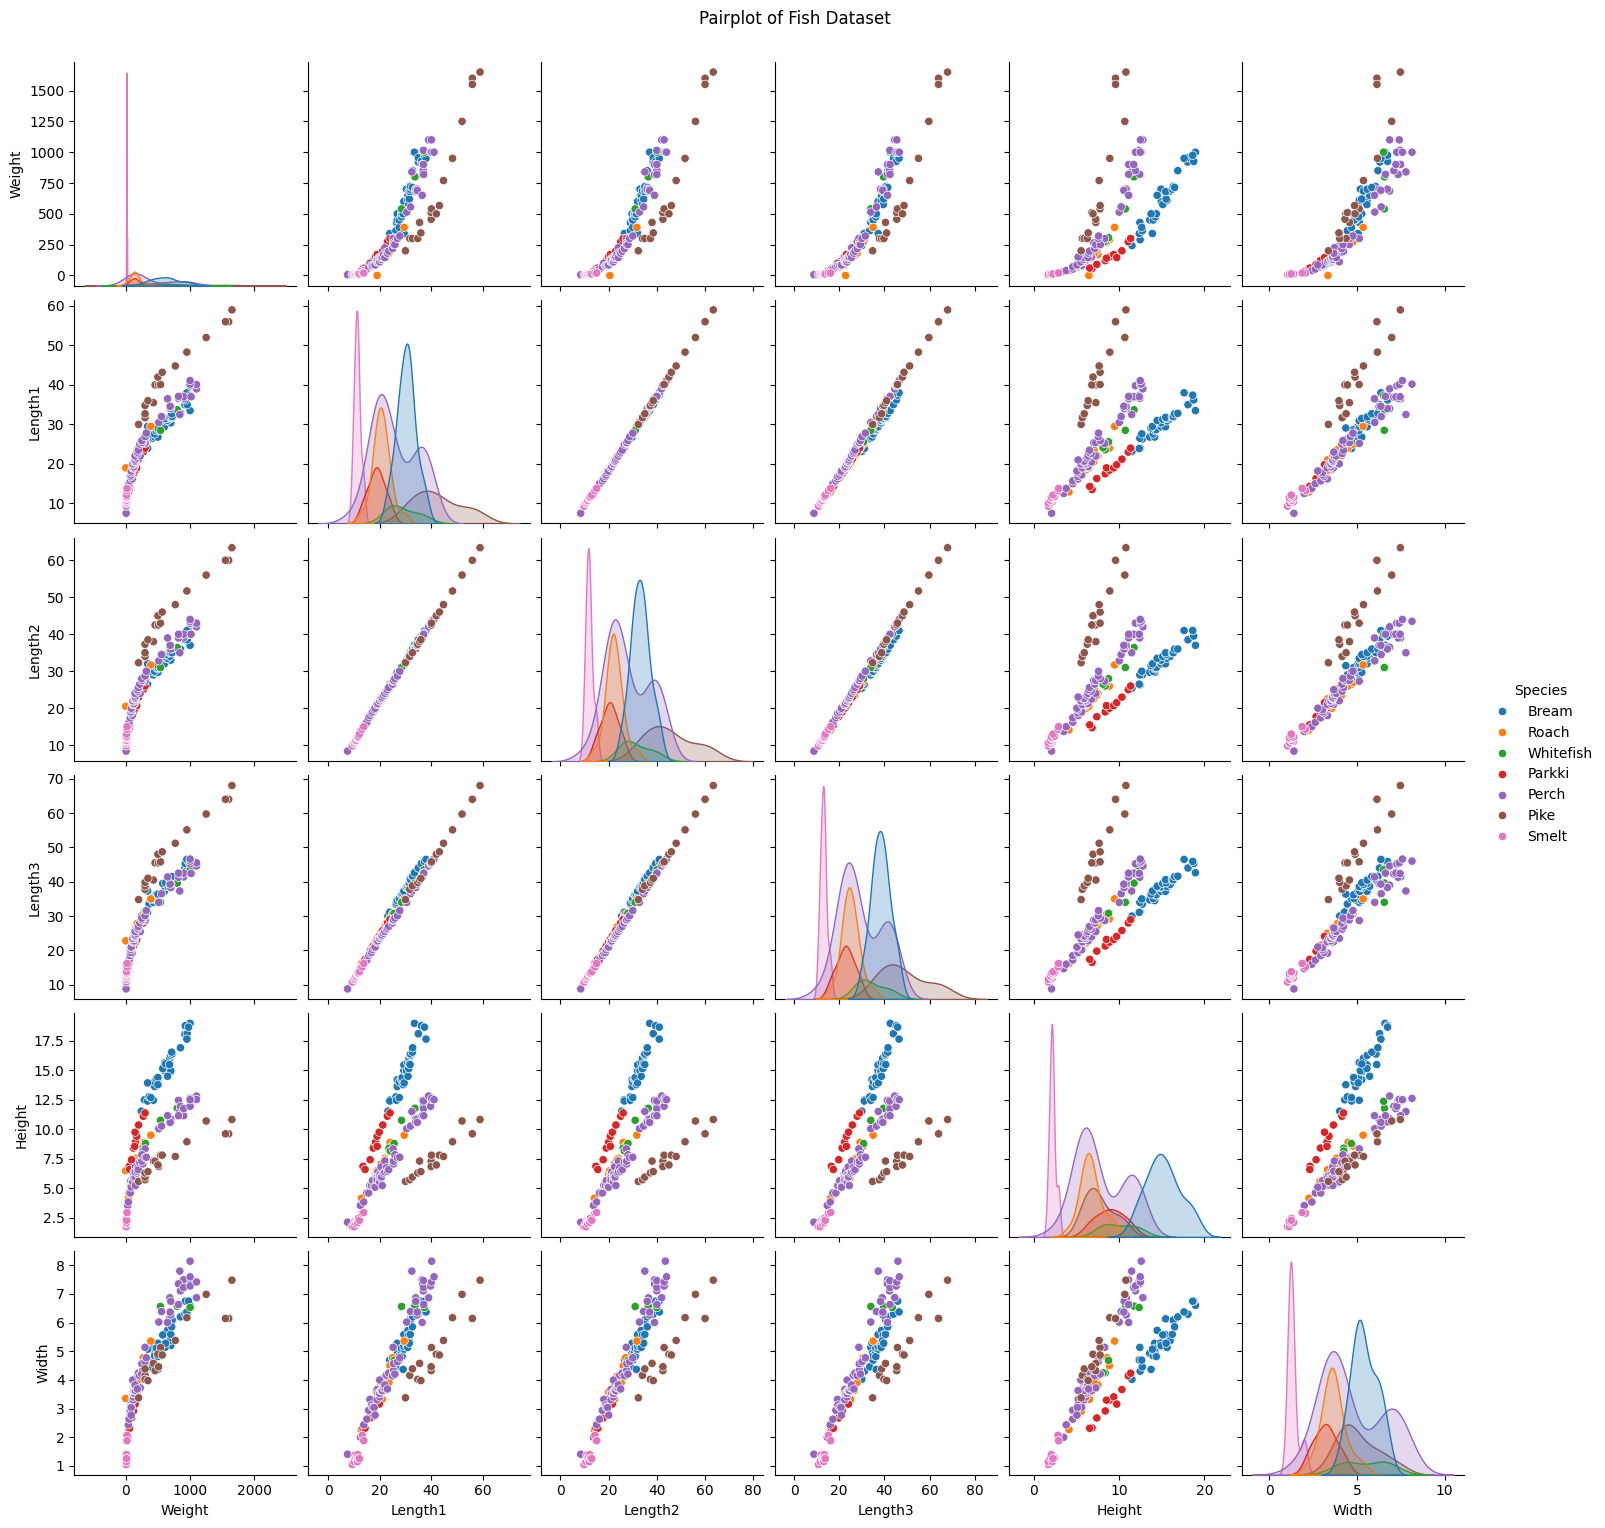

In [416]:
sb.pairplot(df, diag_kind='kde', hue='Species')
plt.suptitle("Pairplot of Fish Dataset", y=1.02)
plt.show()

## Preprocessing

In [417]:
# Calculate Volume of the Fish
df_copy['Volume'] = (df_copy['Length1'] * df_copy['Height'] * df_copy['Width']) + (df_copy['Length2'] * df_copy['Height'] * df_copy['Width']) + (df_copy['Length3'] * df_copy['Height'] * df_copy['Width']) 


In [418]:
# Calculate Density of the Fish
df_copy['Density'] = df_copy['Weight'] / df_copy['Volume']

In [419]:
df_copy

,Species,Weight,Length1,Length2,Length3,Height,Width,Volume,Density
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,3639.997440,0.066484
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,4379.311872,0.066220
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,4737.382006,0.071770
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,5036.604132,0.072072
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,5717.930892,0.075202
...,...,...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936,108.079031,0.112880
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690,115.945992,0.115571
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558,111.232862,0.109680
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672,253.580447,0.077687


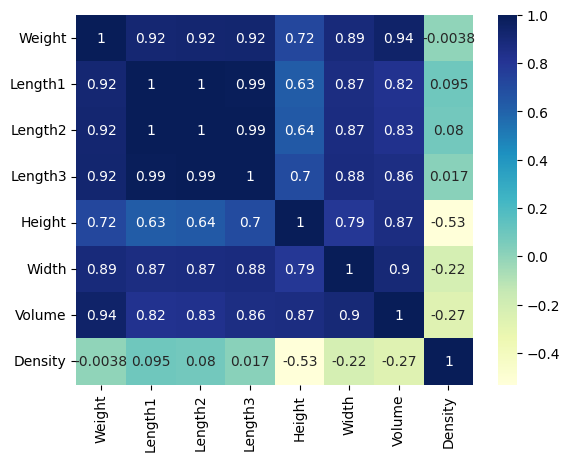

In [420]:
corr = df_copy.select_dtypes(include=np.number).corr()
dataplot = sb.heatmap(corr,  annot=True, cmap="YlGnBu") # cmap="YlGnBu",
plt.show()

## Before Preprocessing

In [421]:
df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [422]:
categorical = df.select_dtypes(exclude = np.number).columns
categorical

Index(['Species'], dtype='object')

In [423]:
classes = dict()
le = LabelEncoder()
for col in categorical:
    df[col]= le.fit_transform(df[col])
    classes[col] = le.classes_

In [424]:
df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [425]:
x = df.drop(columns = 'Weight').values
y = df['Weight'].values

In [426]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_test.shape

(32, 6)

In [427]:
reg = LinearRegression() # ols
reg.fit(x_train, y_train)

LinearRegression()

In [428]:
y_pred = reg.predict(x_test)

In [429]:
np.mean(np.square(y_test - y_pred))


13727.816553006498

In [430]:
np.mean(np.absolute(y_test - y_pred))

97.29791305330397

In [431]:
y_mean = np.mean(y_test)
TSS = np.sum(np.square(y_test - y_mean))
RSS = np.sum(np.square(y_test - y_pred))
1- RSS/ TSS

0.9034878699241474

In [432]:
np.mean(np.abs(y_pred-y_test))

97.29791305330397

In [433]:
r2_score(y_test, y_pred), mean_squared_error(y_test, y_pred), mean_absolute_error(y_test, y_pred)

(0.9034878699241474, 13727.816553006498, 97.29791305330397)

In [434]:
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(x_train, y_train)
y_pred_ridge = ridge_reg.predict(x_test)

r2_score(y_test, y_pred_ridge), mean_squared_error(y_test, y_pred_ridge), mean_absolute_error(y_test, y_pred_ridge)

(0.9033770733556488, 13743.576177893625, 97.370107324952)


## After Preprocessing

In [435]:
categorical = df_copy.select_dtypes(exclude = np.number).columns
categorical

Index(['Species'], dtype='object')

In [436]:
classes = dict()
le = LabelEncoder()
for col in categorical:
    df_copy[col]= le.fit_transform(df_copy[col])
    classes[col] = le.classes_

In [437]:
x = df_copy.drop(columns = 'Weight').values
y = df_copy['Weight'].values

In [438]:
from sklearn.preprocessing import PolynomialFeatures

In [439]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_test.shape

(32, 8)

In [440]:
reg = LinearRegression() # ols
reg.fit(x_train, y_train)

LinearRegression()

In [441]:
y_pred = reg.predict(x_test)

In [442]:
np.mean(np.square(y_test - y_pred))


2752.0076363611024

In [443]:
np.mean(np.absolute(y_test - y_pred))

40.68898464085558

In [444]:
y_mean = np.mean(y_test)
TSS = np.sum(np.square(y_test - y_mean))
RSS = np.sum(np.square(y_test - y_pred))
1- RSS/ TSS

0.9806522677554245

In [445]:
np.mean(np.abs(y_pred-y_test))

40.68898464085558

In [446]:
r2_score(y_test, y_pred), mean_squared_error(y_test, y_pred), mean_absolute_error(y_test, y_pred)

(0.9806522677554245, 2752.0076363611024, 40.68898464085558)

In [447]:
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(x_train, y_train)
y_pred_ridge = ridge_reg.predict(x_test)

r2_score(y_test, y_pred_ridge), mean_squared_error(y_test, y_pred_ridge), mean_absolute_error(y_test, y_pred_ridge)

(0.9754161291222533, 3496.7922613174596, 40.82872389146857)

## PolynomialFeatures degree = 2

In [448]:
categorical = df_copy.select_dtypes(exclude = np.number).columns
categorical

Index([], dtype='object')

In [449]:
classes = dict()
le = LabelEncoder()
for col in categorical:
    df_copy[col]= le.fit_transform(df_copy[col])
    classes[col] = le.classes_

In [450]:
x = df_copy.drop(columns = 'Weight').values
y = df_copy['Weight'].values

In [451]:
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)

In [452]:
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.2, random_state=42)
x_test.shape

(32, 45)

In [453]:
reg = LinearRegression() # ols
reg.fit(x_train, y_train)

LinearRegression()

In [454]:
y_pred = reg.predict(x_test)

In [455]:
np.mean(np.square(y_test - y_pred))

2.3846110506659025e-21

In [456]:
np.mean(np.absolute(y_test - y_pred))

3.055333763768431e-11

In [457]:
y_mean = np.mean(y_test)
TSS = np.sum(np.square(y_test - y_mean))
RSS = np.sum(np.square(y_test - y_pred))
1- RSS/ TSS

1.0

In [458]:
r2_score(y_test, y_pred), mean_squared_error(y_test, y_pred), mean_absolute_error(y_test, y_pred)

(1.0, 2.3846110506659025e-21, 3.055333763768431e-11)

In [459]:
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(x_train, y_train)
y_pred_ridge = ridge_reg.predict(x_test)

r2_score(y_test, y_pred_ridge), mean_squared_error(y_test, y_pred_ridge), mean_absolute_error(y_test, y_pred_ridge)

C:\Users\71518\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.79655e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


(0.9999999999976904, 3.2850911846186277e-07, 0.0004198638533871035)